In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Marketing_Data.csv")

In [3]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


### EDA

In [5]:
df.isna().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [6]:
df[df["youtube"]==0]["sales"]

Series([], Name: sales, dtype: float64)

In [7]:
df[df["facebook"]==0]["sales"]

98    10.56
Name: sales, dtype: float64

In [8]:
df.drop(98,inplace=True)

In [9]:
df[df["newspaper"]==0]["sales"]

Series([], Name: sales, dtype: float64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    170 non-null    float64
 1   facebook   170 non-null    float64
 2   newspaper  170 non-null    float64
 3   sales      170 non-null    float64
dtypes: float64(4)
memory usage: 6.6 KB


In [11]:
df.describe()

,youtube,facebook,newspaper,sales
count,170.000000,170.000000,170.000000,170.000000
mean,178.502118,27.834353,35.382353,16.960235
std,102.558366,17.839167,24.906609,6.314210
min,0.840000,0.360000,0.360000,1.920000
25%,90.840000,11.910000,14.430000,12.600000
50%,183.840000,26.880000,31.380000,15.660000
75%,263.370000,43.740000,51.240000,20.850000
max,355.680000,59.520000,121.080000,32.400000


In [12]:
from scipy.stats import skew

youtube
-0.07396635007135664


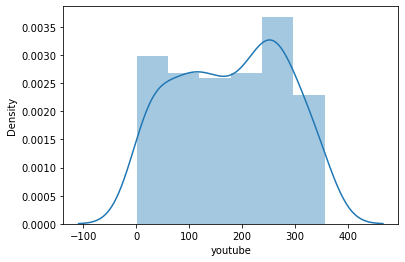

facebook
0.1079095614381547


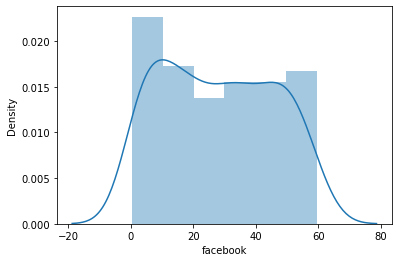

newspaper
0.808548087978827


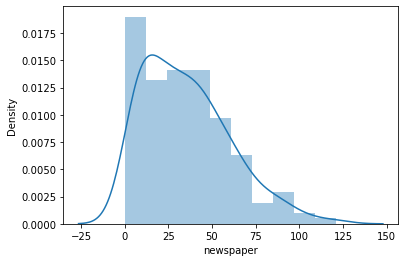

sales
0.39464602976110297


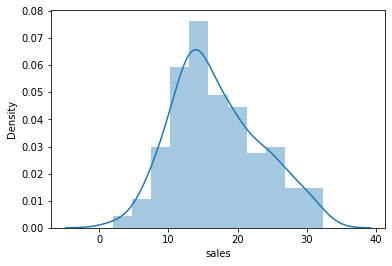

In [13]:
for i in df:
    print(i)
    print(skew(df[i]))
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:>

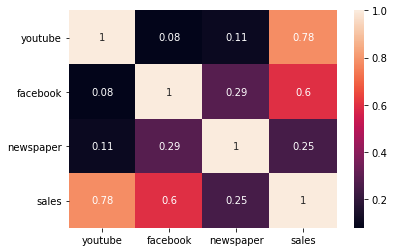

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df["newspaper"].value_counts()

11.16    3
10.44    3
30.72    3
35.64    2
25.68    2
        ..
38.04    1
41.40    1
7.08     1
42.84    1
50.16    1
Name: newspaper, Length: 147, dtype: int64

In [16]:
df["newspaper"]=np.sqrt(df["newspaper"])

In [17]:
skew(df["newspaper"])

0.024554322426232508

In [18]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

### Model Training

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lireg=LinearRegression()
lireg.fit(xtrain,ytrain)
ypred=lireg.predict(xtest)

In [21]:
lireg.coef_

array([0.04493759, 0.19001287, 0.03010457])

In [22]:
lireg.intercept_

3.4263035705027853

In [23]:
dic={"actual Y":ytest,"predicted Y":ypred}
pd.DataFrame(dic)

,actual Y,predicted Y
0,17.04,16.546990
1,18.60,17.380889
2,17.76,19.513689
3,21.60,20.432232
4,20.76,19.697022
5,11.28,7.855463
6,11.40,13.799958
7,15.48,16.668183
8,22.80,21.918374
9,13.08,14.778242


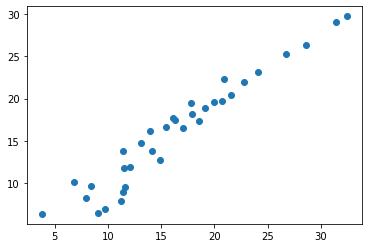

In [24]:
plt.scatter(ytest,ypred)

In [25]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
df1=pd.DataFrame(lireg.coef_,x.columns,columns=["Coefficent"])

In [27]:
df1

,Coefficent
youtube,0.044938
facebook,0.190013
newspaper,0.030105


### Interpretation

- For every unit growth, in youtube, we eastimate that sale will growth by $0.044920
- For every unit growth, in facebook, we eastimate that sale will growth by $0.190051
- For every unit growth, in newspaper, we estimate that sale will growth by $0.030105

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f"MAE - {mean_absolute_error(ytest,ypred)}")
print(f"MSE - {mean_squared_error(ytest,ypred)}")
print(f"RMSE - {np.sqrt(mean_squared_error(ytest,ypred))}")
print(f"R2 Score - {r2_score(ytest,ypred)}")

MAE - 1.5500904376194895
MSE - 3.264372784639487
RMSE - 1.8067575334392512
R2 Score - 0.9298445796056954


##### Predictive model is 92 % accurate 